# Object oriented programming 3 - code structure

## Yesterday's exercise: Atom and Molecule

This is an example of how yesterday's exercise could be solved.

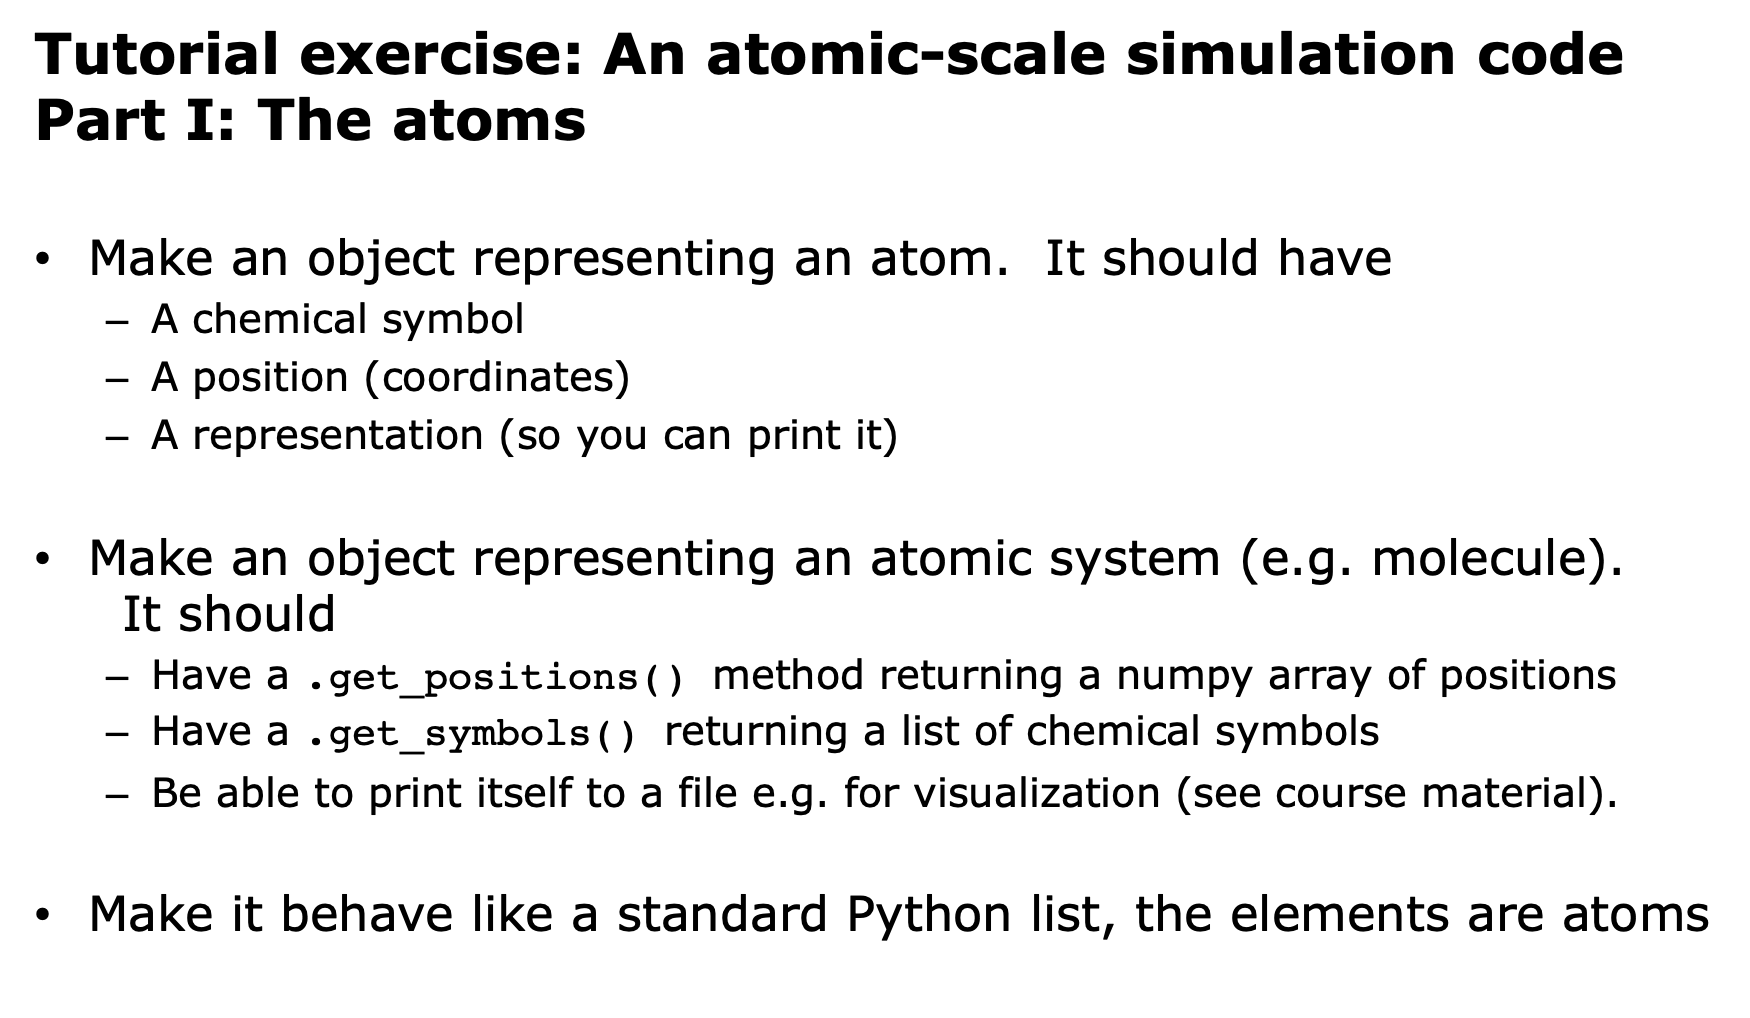

In [4]:
import numpy as np

In [44]:
%%writefile atom.py
class Atom:
    def __init__(self, symbol, x, y, z):
        self.symbol = symbol
        self.position = np.array([x, y, z])
    def __repr__(self):
        template = "Atom(symbol='{}', position=({:.3f}, {:.3f}, {:.3f}) )"
        return template.format(self.symbol, 
                               self.position[0],
                               self.position[1],
                               self.position[2])

Writing atom.py


Test it

In [6]:
Atom("Au", 0.0, 1.0, 34.0)

Atom(symbol='Au', position=(0.000, 1.000, 34.000) )

In [7]:
class Molecule:
    def __init__(self, atoms):
        # Check that atoms is a sequence of atoms objects
        for a in atoms:
            assert isinstance(a, Atom)
        # Store the atoms (making sure they are a list,
        # make a copy of the list in any case)
        self.atoms = list(atoms)
    def get_positions(self):
        "Return the positions of all atoms as an Nx3 array"
        pos = []
        for a in self.atoms:
            pos.append(a.position)
        return np.array(pos)
    def get_symbols(self):
        "Return a list of the chemical symbols of all atoms"
        symb = []
        for a in self.atoms:
            symb.append(a.symbol)
        return symb
    def __repr__(self):
        "The representation - for brevity include only symbols"
        template = "Atoms(N={}, symbols: {})"
        all_symbols = " ".join(self.get_symbols())
        return template.format(len(self.atoms), all_symbols)
    def write_to_file(self, filename):
        f = open(filename, "w")
        print(len(self.atoms), file=f)
        print("A molecule", file=f)
        template = "{}  {:.3f} {:.3f} {:.3f}"
        for a in self.atoms:
            print(template.format(a.symbol, a.position[0], a.position[1], a.position[2]), file=f)
        f.close()

Let's test it!

In [8]:
oxy = Atom('O', 0, 0, 0)
hyd1 = Atom('H', 0, 0.7632, 0.5936)
hyd2 = Atom('H', 0, -0.7632, 0.5936)
water = Molecule([hyd1, hyd2, oxy])
print(water)

Atoms(N=3, symbols: H H O)


In [9]:
water.get_positions()

array([[ 0.    ,  0.7632,  0.5936],
       [ 0.    , -0.7632,  0.5936],
       [ 0.    ,  0.    ,  0.    ]])

In [10]:
water.write_to_file("water.xyz")

In [11]:
f = open("water.xyz")
print(f.read())
f.close()

3
A molecule
H  0.000 0.763 0.594
H  0.000 -0.763 0.594
O  0.000 0.000 0.000



We can call the ase gui to view the file.

The "!" syntax means run a command on the local computer (this is a Jupyter thing, not a Python thing - Python will not see that line).

Obviously, if you run stuff in the cloud this will not work.

In [12]:
!ase gui water.xyz

Fontconfig warning: ignoring iso_8859_1: not a valid region tag


### Making Molecule behave like a Python sequence
Let's implement rudimentary behaviour like a Python sequence: A length and indexing.

In [13]:
class Molecule:
    def __init__(self, atoms):
        # Check that atoms is a sequence of atoms objects
        for a in atoms:
            assert isinstance(a, Atom)
        # Store the atoms (making sure they are a list,
        # make a copy of the list in any case)
        self.atoms = list(atoms)
    def get_positions(self):
        "Return the positions of all atoms as an Nx3 array"
        pos = []
        for a in self.atoms:
            pos.append(a.position)
        return np.array(pos)
    def get_symbols(self):
        "Return a list of the chemical symbols of all atoms"
        symb = []
        for a in self.atoms:
            symb.append(a.symbol)
        return symb
    def __repr__(self):
        "The representation - for brevity include only symbols"
        template = "Atoms(N={}, symbols: {})"
        all_symbols = " ".join(self.get_symbols())
        return template.format(len(self.atoms), all_symbols)
    def write_to_file(self, filename):
        f = open(filename, "w")
        print(len(self.atoms), file=f)
        print("A molecule", file=f)
        template = "{}  {:.3f} {:.3f} {:.3f}"
        for a in self.atoms:
            print(template.format(a.symbol, a.position[0], a.position[1], a.position[2]), file=f)
        f.close()
        
    # EVERYTHING ABOVE THIS LINE WAS COPY-PASTED FROM ABOVE
    # But this is new:
    
    # The length of the object
    def __len__(self):
        return len(self.atoms)
    
    # Indexing
    def __getitem__(self, n):
        return self.atoms[n]

In [14]:
water = Molecule([hyd1, hyd2, oxy])
print(water)
print("Number of atoms:", len(water))
print("An atom:", water[1])

Atoms(N=3, symbols: H H O)
Number of atoms: 3
An atom: Atom(symbol='H', position=(0.000, -0.763, 0.594) )


Is this enought to loop over the atoms?

In [15]:
for a in water:
    print(a)

Atom(symbol='H', position=(0.000, 0.763, 0.594) )
Atom(symbol='H', position=(0.000, -0.763, 0.594) )
Atom(symbol='O', position=(0.000, 0.000, 0.000) )


But a list should implement many other methods: You can ``.append()`` to it, set an element, etc.

A Python sequence should have these:
https://docs.python.org/3/library/stdtypes.html#common-sequence-operations

A Python list also have these:
https://docs.python.org/3/library/stdtypes.html#mutable-sequence-types

## Don't reinvent the wheel: Inherit from Python's ``list`` class !

In [16]:
class Molecule(list):     ## We inherit from built-in class list
    # __init__ has been removed.  We could extend it with a type-check
    def get_positions(self):
        "Return the positions of all atoms as an Nx3 array"
        pos = []
        for a in self:      ## WAS:   for a in self.atoms:
            pos.append(a.position)
        return np.array(pos)
    def get_symbols(self):
        "Return a list of the chemical symbols of all atoms"
        symb = []
        for a in self:      ## WAS:   for a in self.atoms:
            symb.append(a.symbol)
        return symb
    def __repr__(self):
        "The representation - for brevity include only symbols"
        template = "Atoms(N={}, symbols: {})"
        all_symbols = " ".join(self.get_symbols())
        return template.format(len(self), all_symbols)  # len(self.atoms) -> len(self)
    def write_to_file(self, filename):
        f = open(filename, "w")
        print(len(self), file=f)
        print("A molecule", file=f)
        template = "{}  {:.3f} {:.3f} {:.3f}"
        for a in self:      ## WAS:   for a in self.atoms:
            print(template.format(a.symbol, a.position[0], a.position[1], a.position[2]), file=f)
        f.close()
        
    # All magic methods are inherited from list

In [17]:
water = Molecule([hyd1, hyd2, oxy])
print(water)
print("Number of atoms:", len(water))
print("An atom:", water[1])

Atoms(N=3, symbols: H H O)
Number of atoms: 3
An atom: Atom(symbol='H', position=(0.000, -0.763, 0.594) )


In [18]:
hyd3 = Atom("H", 0, 0, -0.967)
water.append(hyd3)    # It's a list, so it supports .append()

In [19]:
water.write_to_file("H3O.xyz")
!ase gui H3O.xyz

Fontconfig warning: ignoring iso_8859_1: not a valid region tag


## In-context Python trick: Formatted output
First, let us make an array and print it the way we did in ``Molecule``.

In [20]:
data = np.array([[0.000, 0.763, 0.594],
                 [0.000, -0.763, 0.594],
                 [0.000, 0.000, 0.000]])
data

array([[ 0.   ,  0.763,  0.594],
       [ 0.   , -0.763,  0.594],
       [ 0.   ,  0.   ,  0.   ]])

In [21]:
for row in data:
    print("{:.2f} {:.2f} {:.2f}".format(row[0], row[1], row[2]))

0.00 0.76 0.59
0.00 -0.76 0.59
0.00 0.00 0.00


### Format strings - simplified

{``variable``:``format``}    both ``variable`` and ``format`` can be left out, but the colon should be there if and only if the format is there.

``format`` is a letter specifying the way to format it (e.g. ``f`` for floating point), preceded by a specification of how to print it (i.e. number of digits).

Other format letters are ``e`` (exponential notation); ``g`` (general notation - same as ``f`` or ``e`` depending on what is sensible;  ``d`` (integer as normal "decimal" number); ``x`` (decimal in hexadecimal notation) and many more.

For all types, the letter can be preceded by an integer giving the number of characters to use.  For floats, you can also specify the number of digits after the decimal point.

``variable`` can be an integer to give which agument should be printed here.

In [ ]:
for row in data:
    print("{0:10.4f} {1:10.2e} {2:10.6f}".format(row[0], row[1], row[2]))

``variable`` can be a name of an argument - then you can also index it, and access its attributes!

In [ ]:
for row in data:
    print("{symbol} {r[0]:10.4f} {r[1]:<10.2e} {r[2]:10.5f} {r.dtype}".format(r=row, symbol='C'))

## Out-of-context Python trick #3:
### List comprehensions

The obvious way to build a list:

In [ ]:
squares = []
for i in range(10):
    squares.append(i*i)
    
print(squares)

This can also be done with a *list comprehension*

In [ ]:
squares = [i*i for i in range(10)]

print(squares)

A more complex example:

<div>
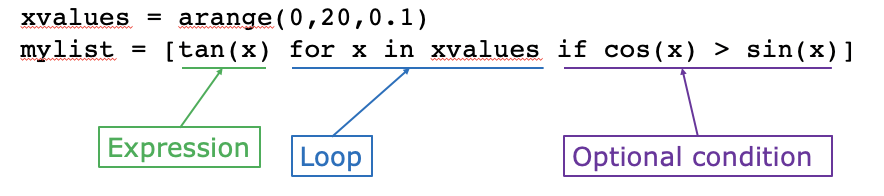
</div>
<br>

Let's try it.

In [ ]:
xvalues = np.arange(0,20,0.1)
mylist = [np.tan(x) for x in xvalues if np.cos(x) > np.sin(x)]

print(len(mylist), len(xvalues))

## An aside: List comprehensions and generator expressions

In [1]:
l = [i*i for i in range(10)]
l

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [2]:
g = (i*i for i in range(10))
g

<generator object <genexpr> at 0x0000018B36334350>

In [3]:
for i in l:
    print(i)

0
1
4
9
16
25
36
49
64
81


In [4]:
for i in l:
    print(i)

0
1
4
9
16
25
36
49
64
81


In [5]:
for i in g:
    print(i)

0
1
4
9
16
25
36
49
64
81


In [6]:
for i in g:
    print(i)

In [7]:
print(g)

<generator object <genexpr> at 0x0000018B36334350>


In [8]:
for i in g:
    print(i)

### An example:
Using list comprehensions to make a class more readable

In [ ]:
class Atom:
    def __init__(self, symbol, position):
        self.symbol = symbol
        self.position = position
        assert len(position) ==3
        
    def __repr__(self):
        return "Atom[{s}:({p[0]:.5f},{p[1]:.5f},{p[2]:.5f})]".format(
            s=self.symbol, p=self.position)

In [ ]:
class Molecule(list):
    """A molecule is a list of Atoms with a bit of extra functionality."""
    def get_positions(self):
        return [a.position for a in self]
    def get_symbols(self):
        return [a.symbol for a in self]

### A very useful generator: ``enumerate``

In [ ]:
words = ["A", "list", "of", "words"]
b = np.zeros(len(words))
for i in range(len(words)):
    b[i] = len(words[i])
print(b)

In [ ]:
enumerate(words)

In [ ]:
list(enumerate(words))

In [ ]:
b = np.zeros(len(words), int)
for i, w in enumerate(words):
    b[i] = len(w)
print(b)

### Time to return to the slides - to learn about *modules* and *packages*

## Modules

See module definition in the file ``vector.py``

In [22]:
import vector

In [23]:
v = vector.Vector(4,6)

In [24]:
v

Vector(4.000,6.000)

In [25]:
from vector import Vector

In [26]:
Vector(232, 5)

Vector(232.000,5.000)

In [43]:
%%writefile molecule.py
class Molecule:
    def __init__(self, atoms):
        # Check that atoms is a sequence of atoms objects
        for a in atoms:
            assert isinstance(a, Atom)
        # Store the atoms (making sure they are a list,
        # make a copy of the list in any case)
        self.atoms = list(atoms)
    def get_positions(self):
        "Return the positions of all atoms as an Nx3 array"
        pos = []
        for a in self.atoms:
            pos.append(a.position)
        return np.array(pos)
    def get_symbols(self):
        "Return a list of the chemical symbols of all atoms"
        symb = []
        for a in self.atoms:
            symb.append(a.symbol)
        return symb
    def __repr__(self):
        "The representation - for brevity include only symbols"
        template = "Atoms(N={}, symbols: {})"
        all_symbols = " ".join(self.get_symbols())
        return template.format(len(self.atoms), all_symbols)
    def write_to_file(self, filename):
        f = open(filename, "w")
        print(len(self.atoms), file=f)
        print("A molecule", file=f)
        template = "{}  {:.3f} {:.3f} {:.3f}"
        for a in self.atoms:
            print(template.format(a.symbol, a.position[0], a.position[1], a.position[2]), file=f)
        f.close()

    # The length of the object
    def __len__(self):
        return len(self.atoms)
    
    # Indexing
    def __getitem__(self, n):
        return self.atoms[n]

Writing molecule.py


In [28]:
oxy = Atom('O', 0, 0, 0)
hyd1 = Atom('H', 0, 0.7632, 0.5936)
hyd2 = Atom('H', 0, -0.7632, 0.5936)
water = Molecule([hyd1, hyd2, oxy])
print(water)
print("Number of atoms:", len(water))
print("An atom:", water[1])

Atoms(N=3, symbols: H H O)
Number of atoms: 3
An atom: Atom(symbol='H', position=(0.000, -0.763, 0.594) )


In [1]:
import numpy as np
class LennardJonesSingleElement:
    def __init__(self, atoms, epsilon, sigma):
        self.atoms = list(atoms)
        self.epsilon = epsilon
        self.sigma = sigma
        # etc
    def calculate(self):
        for i in range(len(self.atoms)):
            for j in range(len(self.atoms)):
                if i != j:
                    diff = self.atoms[i].position - self.atoms[j].position
                    r = np.sqrt(diff[0]**2 + diff[1]**2 + diff[2]**2)
                    energy = 4*self.epsilon*((self.sigma/r)**12-(self.sigma/r)**6)
        return energy

In [2]:
import numpy as np
from asee.atom import Atom
from asee.molecule import Molecule
oxy = Atom('O', 0, 0, 0)
hyd1 = Atom('H', 0, 0.7632, 0.5936)
hyd2 = Atom('H', 0, -0.7632, 0.5936)
water = Molecule([hyd1, hyd2, oxy])
a = LennardJonesSingleElement(water, 4.4778900, 0.5523570)
print(a.calculate())

-0.601009715932464


In [ ]:
import numpy as np
from LennardJonesSingleElement import calculate()
class Dynamics:
    def __init__(self, molecule):
        self.molecule = molecule

    def dynamics(self, molecule):
        masses = molecule.get_masses()
        pos = mol.get_position()
        vel = mol.get_velocity()
        energy, force = molecule.calculate()
        while Ture:
            vel += 0.5 * 
        